### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [26]:
data = pd.read_csv('data/coupons.csv')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [28]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [29]:
# Display the shape of the dataset
print("-" * 40)
print(f"Shape of the dataset:{data.shape}")
print("-" * 40)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

print(f"Duplicate record count:  {duplicate_rows}")
print("-" * 40)

# Check for missing values
data_null_count = data.isnull().sum()
print("Missing values in each column:")
print("-" * 40)
print(data_null_count[data_null_count > 0])
print("-" * 40)

# Display data types for each column to convert them if necessary
print("Data types for each column:")
print("-" * 40)
print(data.dtypes)
print("-" * 40)

# Display value counts for each column to check for problematic values
for col in data.columns:
    print(f"Value counts for column '{col}':")
    print(data[col].value_counts(dropna=False))
    print("-" * 40)



----------------------------------------
Shape of the dataset:(12684, 26)
----------------------------------------
Duplicate record count:  74
----------------------------------------
Missing values in each column:
----------------------------------------
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64
----------------------------------------
Data types for each column:
----------------------------------------
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car    

3. Decide what to do about your missing data -- drop, replace, other...

In [30]:
# Delete the duplicate rows
data.drop_duplicates(inplace=True)

# Drop car column as the missing data is above 90% (12576 out of 12684)
data.drop('car', axis=1, inplace=True)

# Fill missing values in categorical columns with mode
data['Bar'] = data['Bar'].fillna(data['Bar'].mode().iloc[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode().iloc[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode().iloc[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode().iloc[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode().iloc[0])

print(f"Shape of the dataset after cleaning the data: {data.shape}")
print(f"Duplicate row count after cleaning the data: {data.duplicated().sum()}")
print(f"Null values after cleaning the data:   {data.isnull().any().sum()}")

Shape of the dataset after cleaning the data: (12610, 25)
Duplicate row count after cleaning the data: 0
Null values after cleaning the data:   0


4. What proportion of the total observations chose to accept the coupon?



56.8% of the total observations chose to accept the coupon.


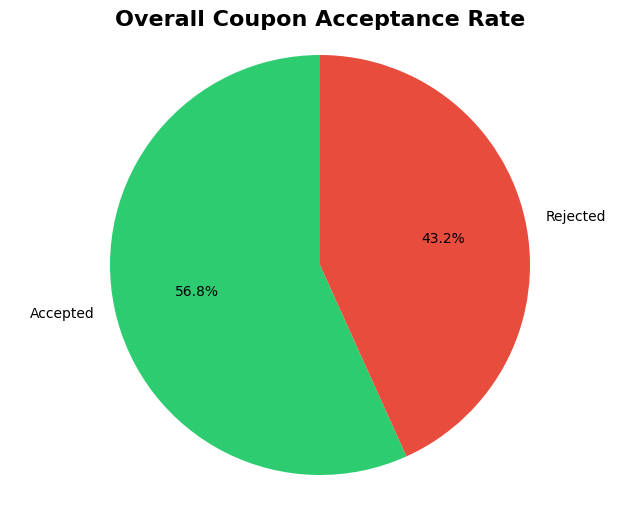

In [31]:
acceptance_rate = data['Y'].mean()
accepted_count = data['Y'].sum()
print(f"{acceptance_rate:.1%} of the total observations chose to accept the coupon.")

plt.figure(figsize=(8, 6))
categories = ['Accepted', 'Rejected']
values = [accepted_count, len(data) - accepted_count]
colors = ['#2ecc71', '#e74c3c']
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Overall Coupon Acceptance Rate', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.savefig('images/overall_coupon_acceptance_rate.png', dpi=300, bbox_inches='tight')
plt.show()

# More than half of customers accept coupons!
# This 56.8% acceptance rate provides a baseline for comparison
# The pie chart clearly visualizes that acceptance outweighs rejection

5. Use a bar plot to visualize the `coupon` column.

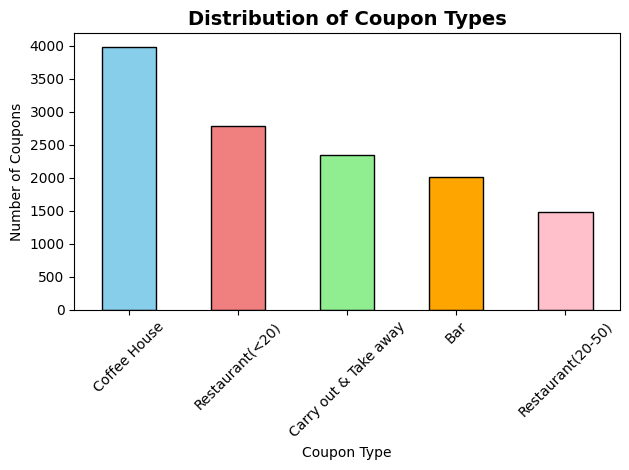

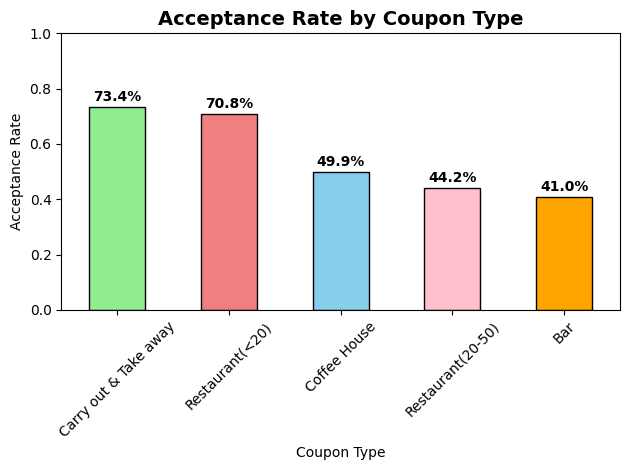

In [32]:
coupon_counts = data['coupon'].value_counts()

# Chart 1: Count of coupon types
coupon_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink'], edgecolor='black')
plt.title('Distribution of Coupon Types', fontsize=14, fontweight='bold')
plt.xlabel('Coupon Type')
plt.ylabel('Number of Coupons')
plt.tick_params(axis='x', rotation=45)
plt.savefig('images/coupon_distribution_type.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# # Chart 2: Acceptance rate by coupon type
acceptance_by_coupon = data.groupby('coupon')['Y'].mean().sort_values(ascending=False)
acceptance_by_coupon.plot(kind='bar', color=['lightgreen', 'lightcoral', 'skyblue', 'pink', 'orange'], edgecolor='black')
plt.title('Acceptance Rate by Coupon Type', fontsize=14, fontweight='bold')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.tick_params(axis='x', rotation=45)
plt.ylim(0, 1)

# Add percentage labels on bars
for i, v in enumerate(acceptance_by_coupon.values):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')
plt.savefig('images/coupon_acceptance_rate_by_type.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# CoffeeHouse gets the most coupons(~4000), but has the moderate acceptance rate (49.9%)
# CarryOut & Take away gets fewer coupons(~2300), but has the highest acceptance rate (73.4%)
# Restaurant(<20) gets medium coupons(~2800), but has the excellent acceptance rate (70.8%)

6. Use a histogram to visualize the temperature column.

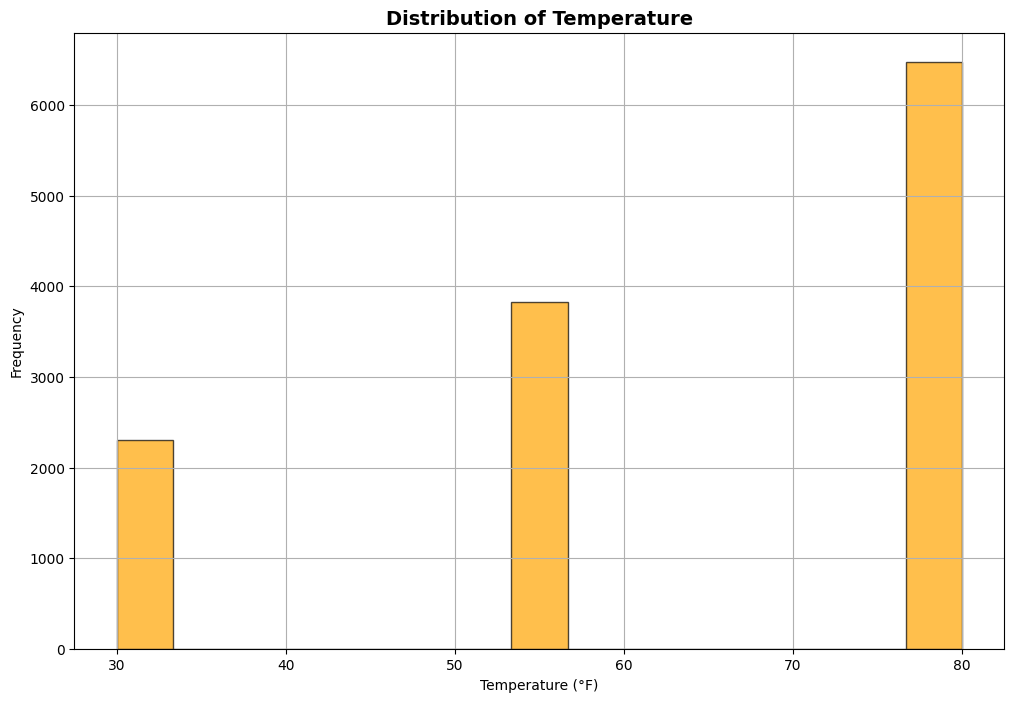

In [33]:
plt.figure(figsize=(12, 8))

# Chart : Temperature distribution
data['temperature'].hist(bins=15, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.savefig('images/temperature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Three discrete temperatures: 30°F, 55°F, and 80°F (no continuous range)
# Clear preference for warmer weather: 80°F(~6500 coupons) dominates the distribution


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [34]:
bar_coupons =  data.query('coupon == "Bar"')
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [35]:
# Calculate the mean to get the acceptance rate
bar_coupons_acceptance_rate = bar_coupons['Y'].mean()
bar_coupons_count = bar_coupons['Y'].shape[0]
print(f"{bar_coupons_acceptance_rate:.1%} of the {bar_coupons_count} bar coupons were accepted.")

# 41.0% of the 2010 bar coupons were accepted.

41.0% of the 2010 bar coupons were accepted.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [36]:
# Group 1: Went to a bar 3 or fewer times a month
bar_visits_3_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]

# Group 2: Went to a bar more than 3 times a month
bar_visists_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

# # Calculate acceptance rates
bar_coupons_accpt_3_or_fewer = bar_visits_3_or_fewer['Y'].mean()
bar_coupons_accpt_more_than_3 = bar_visists_more_than_3['Y'].mean()

print(f"Bar coupons acceptance rate (3 or fewer bar visits/month): {bar_coupons_accpt_3_or_fewer:.1%}")
print(f"Bar coupons acceptance rate (more than 3 bar visits/month): {bar_coupons_accpt_more_than_3:.1%}")

# Bar coupons acceptance rate (3 or fewer bar visits/month): 37.1%
# Bar coupons acceptance rate (more than 3 bar visits/month): 76.9%

Bar coupons acceptance rate (3 or fewer bar visits/month): 37.1%
Bar coupons acceptance rate (more than 3 bar visits/month): 76.9%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
bar_visits_once_age_above25 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
    (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))  # Over 25
]

# All others (everyone who doesn't meet both criteria)
not_over25_and_rare_bar_visitor = bar_coupons[
    ~((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])))
]

# Calculate acceptance rates
bar_visits_once_age_above25_accpt_rate = bar_visits_once_age_above25['Y'].mean()
not_over25_and_rare_bar_visitor_accpt_rate = not_over25_and_rare_bar_visitor['Y'].mean()

print(f"Bar coupons acceptance rate (bar visits more than once and age over 25): {bar_visits_once_age_above25_accpt_rate:.1%}")
print(f"Bar coupons acceptance rate (all others ): {not_over25_and_rare_bar_visitor_accpt_rate:.1%}")

# Bar coupons acceptance rate (bar visits more than once and age over 25): 69.5%
# Bar coupons acceptance rate (all others ): 33.5%

Bar coupons acceptance rate (bar visits more than once and age over 25): 69.5%
Bar coupons acceptance rate (all others ): 33.5%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [38]:
bar_visits_once_no_kid_no_farm = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
    (bar_coupons['passanger'] != 'Kid(s)') &  # Passengers not a kid
    (~bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry']))  # Occupation not farming/fishing/forestry
]

# All others (everyone who doesn't meet all criteria)
not_bar_visits_once_all_others = bar_coupons[
    ~((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (bar_coupons['passanger'] != 'Kid(s)') &
      (~bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry'])))
]

# Calculate acceptance rates
bar_visits_once_no_kid_no_farm_accpt_rate = bar_visits_once_no_kid_no_farm['Y'].mean()
not_bar_visits_once_all_others_accpt_rate = not_bar_visits_once_all_others['Y'].mean()

print(f"Bar coupons acceptance rate (bar visits more than once and no kid and mo farm): {bar_visits_once_no_kid_no_farm_accpt_rate:.1%}")
print(f"Bar coupons acceptance rate (all others): {not_bar_visits_once_all_others_accpt_rate:.1%}")

# Bar coupons acceptance rate (bar visits more than once and no kid and mo farm): 71.3%
# Bar coupons acceptance rate (all others): 29.5%

Bar coupons acceptance rate (bar visits more than once and no kid and mo farm): 71.3%
Bar coupons acceptance rate (all others): 29.5%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [39]:

# Create a combined group of all people who meet ANY of the criteria
combined_criteria_group = data[
    # Group 1 criteria
    ((data['coupon'] == 'Bar') & 
     (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
     (data['passanger'] != 'Kid(s)') &
     (data['maritalStatus'] != 'Widowed')) |
    
    # Group 2 criteria  
    ((data['coupon'] == 'Bar') &
     (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
     (data['age'].isin(['below21', '21', '26']))) |
    
    # Group 3 criteria
    ((data['coupon'] == 'Restaurant(<20)') &
     (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
     (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])))
]

# All others (everyone who doesn't meet any criteria)
not_combined_criteria_group_others = data[~(((data['coupon'] == 'Bar') & 
     (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
     (data['passanger'] != 'Kid(s)') &
     (data['maritalStatus'] != 'Widowed')) |
    
    # Group 2 criteria  
    ((data['coupon'] == 'Bar') &
     (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
     (data['age'].isin(['below21', '21', '26']))) |
    
    # Group 3 criteria
    ((data['coupon'] == 'Restaurant(<20)') &
     (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
     (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))))]

# Calculate acceptance rates
combined_criteria_group_accpt_rate = combined_criteria_group['Y'].mean()
not_combined_criteria_group_accpt_rate = not_combined_criteria_group_others['Y'].mean()

print(f"Combined criteria acceptance rate: {combined_criteria_group_accpt_rate:.1%}")
print(f"All others except combined criteria acceptance rate: {not_combined_criteria_group_accpt_rate:.1%}")

# Combined criteria acceptance rate: 71.3%
# All others except combined criteria acceptance rate: 55.4%



Combined criteria acceptance rate: 71.3%
All others except combined criteria acceptance rate: 55.4%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the Observations, drivers are more likely to accept the bar coupon if they 
- Visit the bars frequently
- Are young (aroun 21)
- Are riding with friends
- Are single
- Are out in the evening
- Have "Some High school" education
- Experience warmer weather

More analysis below:


📊 BAR COUPON DATASET OVERVIEW:
Total Bar Coupons: 2,010
Overall Bar Coupon Acceptance Rate: 41.0%
Accepted: 824 | Rejected: 1,186


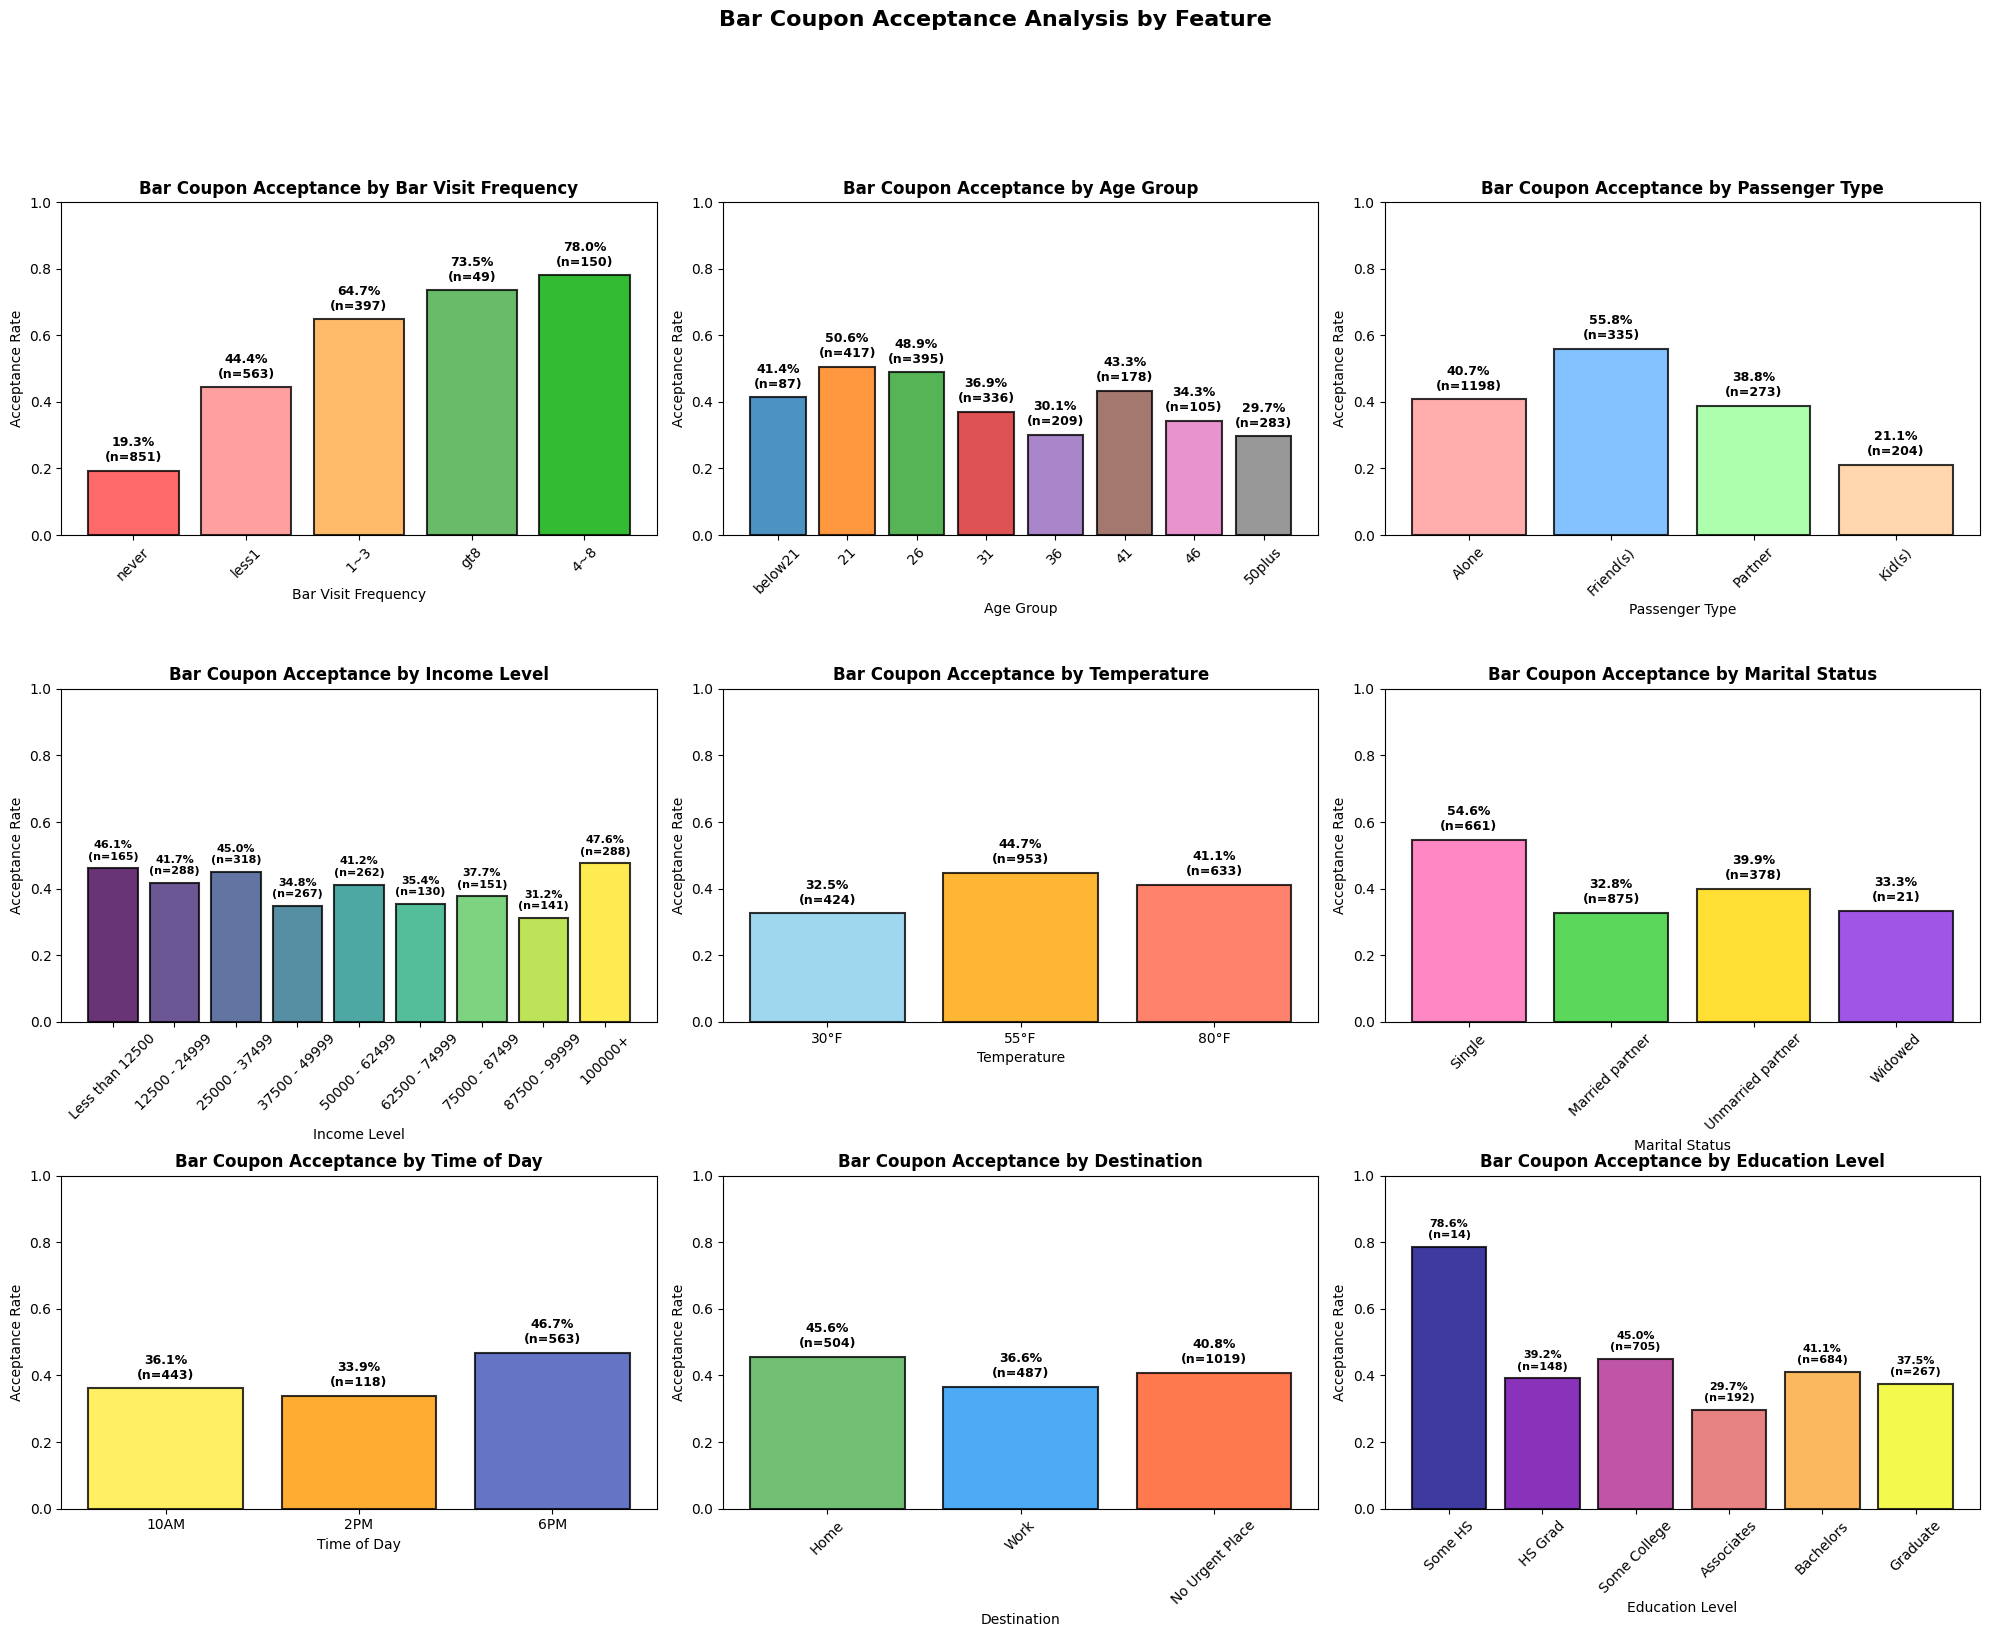


 BAR COUPON ACCEPTANCE INSIGHTS BY FEATURE:

📊 BAR VISIT FREQUENCY:
   🏆 Best: 4~8 (78.0%)
   📉 Worst: never (19.3%)
   💡 Insight: Frequent bar visitors (4~8 visits) show highest acceptance

📊 AGE GROUPS:
   🏆 Best: 21 (50.6%)
   📉 Worst: 50plus (29.7%)
   💡 Insight: Younger demographics generally show higher acceptance rates

📊 PASSENGER TYPE:
   🏆 Best: Friend(s) (55.8%)
   📉 Worst: Kid(s) (21.1%)
   💡 Insight: Social context significantly impacts acceptance

📊 INCOME LEVEL:
   🏆 Best: $100000 or More (47.6%)
   📉 Worst: $87500 - $99999 (31.2%)
   💡 Insight: Middle-income groups show varied acceptance patterns

📊 TEMPERATURE:
   🏆 Best: 55 (44.7%)
   📉 Worst: 30 (32.5%)
   💡 Insight: Warmer weather correlates with higher acceptance

📊 MARITAL STATUS:
   🏆 Best: Single (54.6%)
   📉 Worst: Married partner (32.8%)
   💡 Insight: Relationship status influences bar coupon acceptance

📊 TIME OF DAY:
   🏆 Best: 6PM (46.7%)
   📉 Worst: 2PM (33.9%)
   💡 Insight: Evening hours typically show h

In [40]:
# BAR COUPON ANALYSIS  - Hypothesis about drivers who accepted the bar coupons

print(f"📊 BAR COUPON DATASET OVERVIEW:")
print(f"Total Bar Coupons: {len(bar_coupons):,}")
print(f"Overall Bar Coupon Acceptance Rate: {bar_coupons['Y'].mean():.1%}")
print(f"Accepted: {bar_coupons['Y'].sum():,} | Rejected: {len(bar_coupons) - bar_coupons['Y'].sum():,}")
print("=" * 60)

# Create comprehensive bar chart analysis
plt.figure(figsize=(20, 16))

# 1. Bar Visit Frequency (Top Left)
plt.subplot(3, 3, 1)
bar_freq_acceptance = bar_coupons.groupby('Bar')['Y'].agg(['mean', 'count']).reset_index()
bar_freq_order = bar_coupons['Bar'].unique().tolist()
bar_freq_ordered = bar_freq_acceptance.set_index('Bar').reindex(bar_freq_order).reset_index()

bars1 = plt.bar(bar_freq_ordered['Bar'], bar_freq_ordered['mean'], 
                color=['#ff4444', '#ff8888', '#ffaa44', '#44aa44', '#00aa00'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Bar Coupon Acceptance by Bar Visit Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage labels and counts
for i, (bar, rate, count) in enumerate(zip(bars1, bar_freq_ordered['mean'], bar_freq_ordered['count'])):
    plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
             f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. Age Groups (Top Center)
plt.subplot(3, 3, 2)
age_acceptance = bar_coupons.groupby('age')['Y'].agg(['mean', 'count']).reset_index()
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
age_ordered = age_acceptance.set_index('age').reindex(age_order).reset_index()

bars2 = plt.bar(age_ordered['age'], age_ordered['mean'], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Bar Coupon Acceptance by Age Group', fontsize=12, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars2, age_ordered['mean'], age_ordered['count'])):
    plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
             f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 3. Passenger Type (Top Right)
plt.subplot(3, 3, 3)
passenger_acceptance = bar_coupons.groupby('passanger')['Y'].agg(['mean', 'count']).reset_index()
passenger_order = ['Alone', 'Friend(s)', 'Partner', 'Kid(s)']
passenger_ordered = passenger_acceptance.set_index('passanger').reindex(passenger_order).reset_index()

bars3 = plt.bar(passenger_ordered['passanger'], passenger_ordered['mean'], 
                color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Bar Coupon Acceptance by Passenger Type', fontsize=12, fontweight='bold')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars3, passenger_ordered['mean'], passenger_ordered['count'])):
    plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
             f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 4. Income Level (Middle Left)
plt.subplot(3, 3, 4)
income_acceptance = bar_coupons.groupby('income')['Y'].agg(['mean', 'count']).reset_index()
income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 
                '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
income_ordered = income_acceptance.set_index('income').reindex(income_order).reset_index()

bars4 = plt.bar(range(len(income_ordered)), income_ordered['mean'], 
                color=plt.cm.viridis(np.linspace(0, 1, len(income_ordered))), 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Bar Coupon Acceptance by Income Level', fontsize=12, fontweight='bold')
plt.xlabel('Income Level')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(range(len(income_ordered)), [inc.replace('$', '').replace(' or More', '+') for inc in income_ordered['income']], rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars4, income_ordered['mean'], income_ordered['count'])):
    plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
             f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=8)

# 5. Temperature (Middle Center)
plt.subplot(3, 3, 5)
temp_acceptance = bar_coupons.groupby('temperature')['Y'].agg(['mean', 'count']).reset_index()
temp_order = [30, 55, 80]
temp_ordered = temp_acceptance.set_index('temperature').reindex(temp_order).reset_index()

bars5 = plt.bar([f'{temp}°F' for temp in temp_ordered['temperature']], temp_ordered['mean'], 
                color=['#87ceeb', '#ffa500', '#ff6347'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Bar Coupon Acceptance by Temperature', fontsize=12, fontweight='bold')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

for i, (bar, rate, count) in enumerate(zip(bars5, temp_ordered['mean'], temp_ordered['count'])):
    plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
             f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 6. Marital Status (Middle Right)
plt.subplot(3, 3, 6)
marital_acceptance = bar_coupons.groupby('maritalStatus')['Y'].agg(['mean', 'count']).reset_index()
marital_order = ['Single', 'Married partner', 'Unmarried partner', 'Widowed']
marital_ordered = marital_acceptance.set_index('maritalStatus').reindex(marital_order).reset_index()

bars6 = plt.bar(marital_ordered['maritalStatus'], marital_ordered['mean'], 
                color=['#ff69b4', '#32cd32', '#ffd700', '#8a2be2'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Bar Coupon Acceptance by Marital Status', fontsize=12, fontweight='bold')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars6, marital_ordered['mean'], marital_ordered['count'])):
    plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
             f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 7. Time of Day (Bottom Left)
plt.subplot(3, 3, 7)
time_acceptance = bar_coupons.groupby('time')['Y'].agg(['mean', 'count']).reset_index()
time_order = ['10AM', '2PM', '6PM']
time_ordered = time_acceptance.set_index('time').reindex(time_order).reset_index()

bars7 = plt.bar(time_ordered['time'], time_ordered['mean'], 
                color=['#ffeb3b', '#ff9800', '#3f51b5'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Bar Coupon Acceptance by Time of Day', fontsize=12, fontweight='bold')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

for i, (bar, rate, count) in enumerate(zip(bars7, time_ordered['mean'], time_ordered['count'])):
    plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
             f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 8. Destination (Bottom Center)
plt.subplot(3, 3, 8)
dest_acceptance = bar_coupons.groupby('destination')['Y'].agg(['mean', 'count']).reset_index()
dest_order = ['Home', 'Work', 'No Urgent Place']
dest_ordered = dest_acceptance.set_index('destination').reindex(dest_order).reset_index()

bars8 = plt.bar(dest_ordered['destination'], dest_ordered['mean'], 
                color=['#4caf50', '#2196f3', '#ff5722'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Bar Coupon Acceptance by Destination', fontsize=12, fontweight='bold')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars8, dest_ordered['mean'], dest_ordered['count'])):
    plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
             f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 9. Education Level (Bottom Right)
plt.subplot(3, 3, 9)
edu_acceptance = bar_coupons.groupby('education')['Y'].agg(['mean', 'count']).reset_index()
edu_order = ['Some High School', 'High School Graduate', 'Some college - no degree', 
             'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
edu_ordered = edu_acceptance.set_index('education').reindex(edu_order).reset_index()

bars9 = plt.bar(range(len(edu_ordered)), edu_ordered['mean'], 
                color=plt.cm.plasma(np.linspace(0, 1, len(edu_ordered))), 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Bar Coupon Acceptance by Education Level', fontsize=12, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(range(len(edu_ordered)), ['Some HS', 'HS Grad', 'Some College', 'Associates', 'Bachelors', 'Graduate'], rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars9, edu_ordered['mean'], edu_ordered['count'])):
    plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
             f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.savefig('images/bar_coupon_acceptance_analysis.png', dpi=300)
plt.suptitle('Bar Coupon Acceptance Analysis by Feature', fontsize=16, fontweight='bold', y=1.02)
plt.subplots_adjust(top=0.9)  # Adjust top to fit the title
plt.show()

# Summary analysis
print("\n BAR COUPON ACCEPTANCE INSIGHTS BY FEATURE:")
print("=" * 60)

# Analyze each feature
features_analysis = {
    'Bar Visit Frequency': (bar_freq_ordered, 'Bar', 'Frequent bar visitors (4~8 visits) show highest acceptance'),
    'Age Groups': (age_ordered, 'age', 'Younger demographics generally show higher acceptance rates'),
    'Passenger Type': (passenger_ordered, 'passanger', 'Social context significantly impacts acceptance'),
    'Income Level': (income_ordered, 'income', 'Middle-income groups show varied acceptance patterns'),
    'Temperature': (temp_ordered, 'temperature', 'Warmer weather correlates with higher acceptance'),
    'Marital Status': (marital_ordered, 'maritalStatus', 'Relationship status influences bar coupon acceptance'),
    'Time of Day': (time_ordered, 'time', 'Evening hours typically show higher acceptance'),
    'Destination': (dest_ordered, 'destination', 'Destination type affects willingness to detour'),
    'Education': (edu_ordered, 'education', 'Education level shows mixed correlation patterns')
}

for feature_name, (df, col, insight) in features_analysis.items():
    if not df.empty and not df['mean'].isna().all():
        best_category = df.loc[df['mean'].idxmax(), col] if not df['mean'].isna().all() else 'N/A'
        best_rate = df['mean'].max() if not df['mean'].isna().all() else 0
        worst_category = df.loc[df['mean'].idxmin(), col] if not df['mean'].isna().all() else 'N/A'
        worst_rate = df['mean'].min() if not df['mean'].isna().all() else 0
        range_diff = best_rate - worst_rate if not df['mean'].isna().all() else 0
        
        print(f"\n📊 {feature_name.upper()}:")
        print(f"   🏆 Best: {best_category} ({best_rate:.1%})")
        print(f"   📉 Worst: {worst_category} ({worst_rate:.1%})")
        print(f"   💡 Insight: {insight}")



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [41]:
# 1. Create a DataFrame for Coffee House coupons
coffee_coupons = data[data['coupon'] == 'Coffee House']

print("COFFEE HOUSE COUPON ANALYSIS")
print("=" * 40)

# Basic statistics
total_coffee_coupons = len(coffee_coupons)
accepted_coffee_coupons = coffee_coupons['Y'].sum()
coffee_acceptance_rate = coffee_coupons['Y'].mean()

print(f"   • Total coffee house coupons: {total_coffee_coupons:,}")
print(f"   • Accepted coupons: {accepted_coffee_coupons:,}")
print(f"   • Overall acceptance rate: {coffee_acceptance_rate:.1%}")


COFFEE HOUSE COUPON ANALYSIS
   • Total coffee house coupons: 3,989
   • Accepted coupons: 1,989
   • Overall acceptance rate: 49.9%


In [42]:
# 2. Compare acceptance rates by frequency (similar to bar analysis)
print(f" ACCEPTANCE RATES BY VISIT FREQUENCY:")

# Group 1: Infrequent visitors (never, less1)
infrequent_coffee = coffee_coupons[coffee_coupons['CoffeeHouse'].isin(['never', 'less1'])]
rate_infrequent = infrequent_coffee['Y'].mean()

# Group 2: Moderate visitors (1~3)
moderate_coffee = coffee_coupons[coffee_coupons['CoffeeHouse'] == '1~3']
rate_moderate = moderate_coffee['Y'].mean()

# Group 3: Frequent visitors (4~8, gt8)
frequent_coffee = coffee_coupons[coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])]
rate_frequent = frequent_coffee['Y'].mean()

print(f"   • Infrequent visitors (never/less1): {rate_infrequent:.1%} ({len(infrequent_coffee):,} people)")
print(f"   • Moderate visitors (1~3/month): {rate_moderate:.1%} ({len(moderate_coffee):,} people)")
print(f"   • Frequent visitors (4+/month): {rate_frequent:.1%} ({len(frequent_coffee):,} people)")


 ACCEPTANCE RATES BY VISIT FREQUENCY:
   • Infrequent visitors (never/less1): 34.9% (2,071 people)
   • Moderate visitors (1~3/month): 64.7% (1,038 people)
   • Frequent visitors (4+/month): 67.5% (880 people)


In [43]:
# 3. Age analysis - Compare younger vs older

# For coffee, let's use age 35 as the threshold (different from bars)
younger_coffee = coffee_coupons[coffee_coupons['age'].isin(['below21', '21', '26', '31'])]
older_coffee = coffee_coupons[coffee_coupons['age'].isin(['36', '41', '46', '50plus'])]

rate_younger = younger_coffee['Y'].mean()
rate_older = older_coffee['Y'].mean()

print(f"   • Younger drivers (under 35): {rate_younger:.1%} ({len(younger_coffee):,} people)")
print(f"   • Older drivers (35+): {rate_older:.1%} ({len(older_coffee):,} people)")

   • Younger drivers (under 35): 51.9% (2,501 people)
   • Older drivers (35+): 46.4% (1,488 people)


In [44]:
# 4. Time of day analysis (crucial for coffee!)
print(f"TIME OF DAY ANALYSIS:")
time_analysis = coffee_coupons.groupby('time')['Y'].agg(['count', 'mean']).round(1)
for time_period, timeData in time_analysis.iterrows():
    print(f"   • {time_period}: {timeData['mean']:.1%} acceptance ({int(timeData['count']):,} offers)")

# 5. Destination analysis
print(f"\n DESTINATION ANALYSIS:")
dest_analysis = coffee_coupons.groupby('destination')['Y'].agg(['count', 'mean']).round(1)
for dest, destData in dest_analysis.iterrows():
    print(f"   • {dest}: {destData['mean']:.1%} acceptance ({int(destData['count']):,} offers)")

# 6. Weather analysis
print(f"\n WEATHER ANALYSIS:")
weather_analysis = coffee_coupons.groupby('weather')['Y'].agg(['count', 'mean']).round(1)
for weather, weatherData in weather_analysis.iterrows():
    print(f"   • {weather}: {weatherData['mean']:.1%} acceptance ({int(weatherData['count']):,} offers)")

# 7. Passenger analysis
print(f"\n PASSENGER ANALYSIS:")
passenger_analysis = coffee_coupons.groupby('passanger')['Y'].agg(['count', 'mean']).round(1)
for passenger, passengerData in passenger_analysis.iterrows():
    print(f"   • {passenger}: {passengerData['mean']:.1%} acceptance ({int(passengerData['count']):,} offers)")


TIME OF DAY ANALYSIS:
   • 10AM: 60.0% acceptance (898 offers)
   • 10PM: 40.0% acceptance (297 offers)
   • 2PM: 50.0% acceptance (793 offers)
   • 6PM: 40.0% acceptance (1,088 offers)
   • 7AM: 40.0% acceptance (913 offers)

 DESTINATION ANALYSIS:
   • Home: 40.0% acceptance (926 offers)
   • No Urgent Place: 60.0% acceptance (2,150 offers)
   • Work: 40.0% acceptance (913 offers)

 WEATHER ANALYSIS:
   • Rainy: 50.0% acceptance (226 offers)
   • Snowy: 40.0% acceptance (302 offers)
   • Sunny: 50.0% acceptance (3,461 offers)

 PASSENGER ANALYSIS:
   • Alone: 40.0% acceptance (2,253 offers)
   • Friend(s): 60.0% acceptance (1,226 offers)
   • Kid(s): 50.0% acceptance (206 offers)
   • Partner: 60.0% acceptance (304 offers)


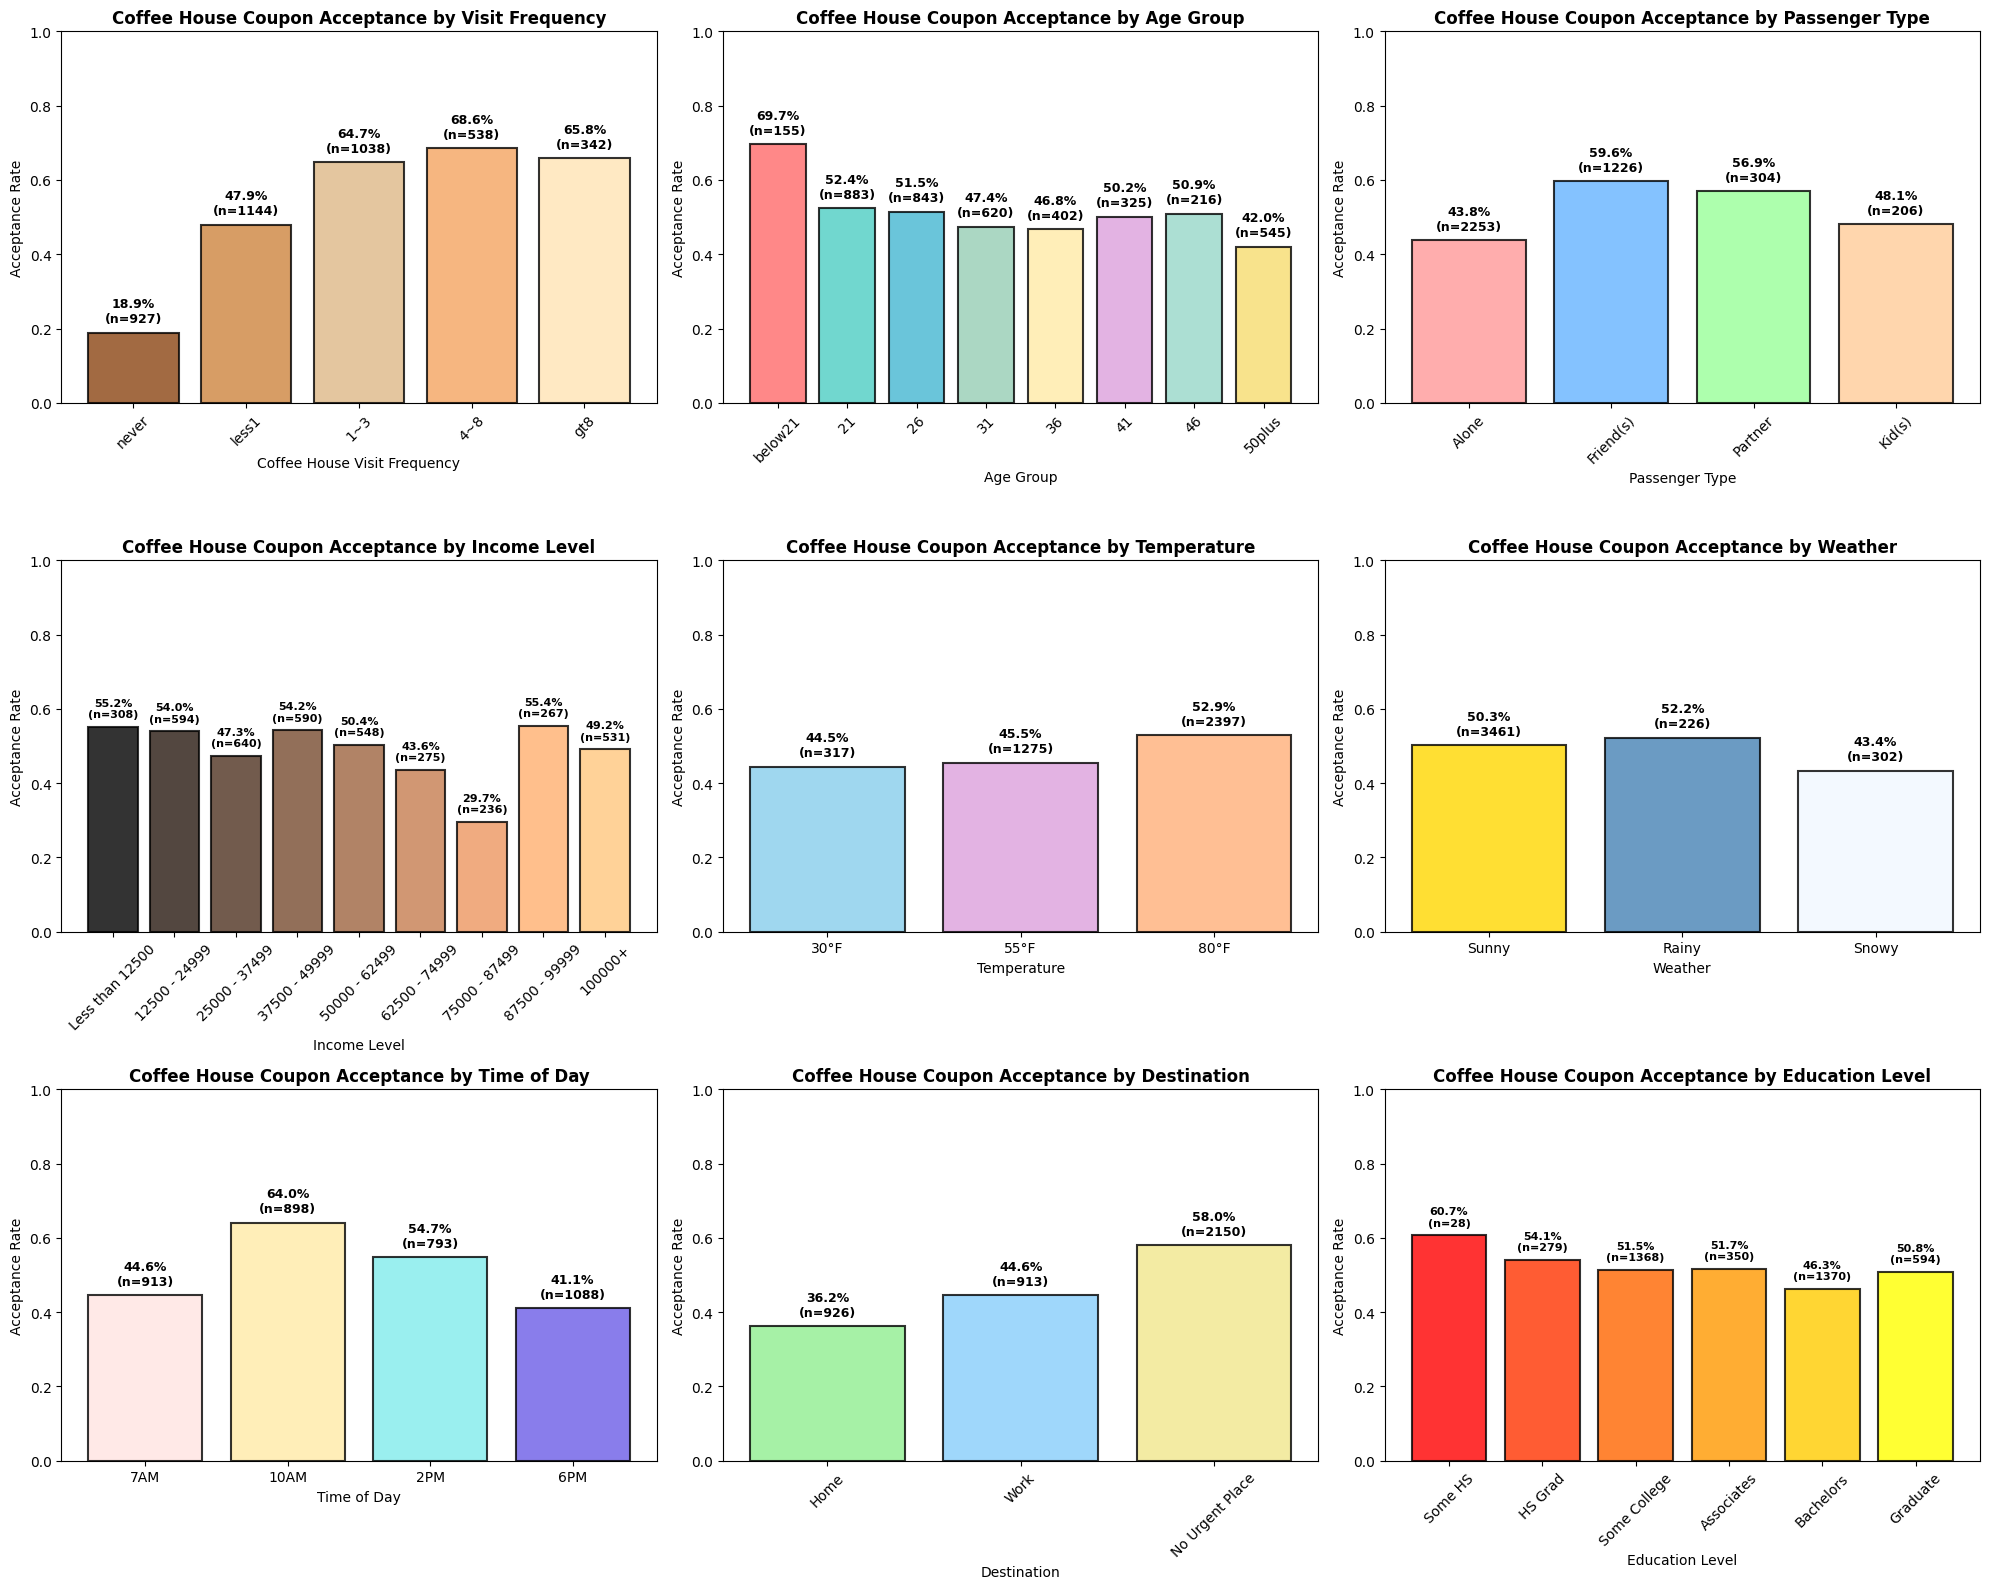


☕ COFFEE HOUSE COUPON ACCEPTANCE INSIGHTS BY FEATURE:

☕ COFFEE HOUSE VISIT FREQUENCY:
   🏆 Best: 4~8 (68.6%)
   📉 Worst: never (18.9%)
   📏 Range: 49.7%
   💡 Insight: Frequent coffee visitors show higher acceptance

☕ AGE GROUPS:
   🏆 Best: below21 (69.7%)
   📉 Worst: 50plus (42.0%)
   📏 Range: 27.7%
   💡 Insight: Age patterns differ from bar coupons

☕ PASSENGER TYPE:
   🏆 Best: Friend(s) (59.6%)
   📉 Worst: Alone (43.8%)
   📏 Range: 15.9%
   💡 Insight: Social context impacts coffee coupon acceptance

☕ INCOME LEVEL:
   🏆 Best: $87500 - $99999 (55.4%)
   📉 Worst: $75000 - $87499 (29.7%)
   📏 Range: 25.8%
   💡 Insight: Income level shows varied coffee acceptance patterns

☕ TEMPERATURE:
   🏆 Best: 80 (52.9%)
   📉 Worst: 30 (44.5%)
   📏 Range: 8.4%
   💡 Insight: Temperature affects coffee coupon acceptance

☕ WEATHER:
   🏆 Best: Rainy (52.2%)
   📉 Worst: Snowy (43.4%)
   📏 Range: 8.8%
   💡 Insight: Weather conditions influence coffee preferences

☕ TIME OF DAY:
   🏆 Best: 10AM (64.0%)

In [45]:

# Create comprehensive bar chart analysis
plt.figure(figsize=(20, 16))

# 1. Coffee House Visit Frequency (Top Left)
plt.subplot(3, 3, 1)
coffee_freq_acceptance = coffee_coupons.groupby('CoffeeHouse')['Y'].agg(['mean', 'count']).reset_index()
coffee_freq_order = ['never', 'less1', '1~3', '4~8', 'gt8']
coffee_freq_ordered = coffee_freq_acceptance.set_index('CoffeeHouse').reindex(coffee_freq_order).reset_index()

bars1 = plt.bar(coffee_freq_ordered['CoffeeHouse'], coffee_freq_ordered['mean'], 
                color=['#8B4513', '#CD853F', '#DEB887', '#F4A460', '#FFE4B5'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Coffee House Coupon Acceptance by Visit Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Coffee House Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add percentage labels and counts
for i, (bar, rate, count) in enumerate(zip(bars1, coffee_freq_ordered['mean'], coffee_freq_ordered['count'])):
    if not pd.isna(rate):
        plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
                 f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. Age Groups (Top Center)
plt.subplot(3, 3, 2)
age_acceptance = coffee_coupons.groupby('age')['Y'].agg(['mean', 'count']).reset_index()
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
age_ordered = age_acceptance.set_index('age').reindex(age_order).reset_index()

bars2 = plt.bar(age_ordered['age'], age_ordered['mean'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Coffee House Coupon Acceptance by Age Group', fontsize=12, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars2, age_ordered['mean'], age_ordered['count'])):
    if not pd.isna(rate):
        plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
                 f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 3. Passenger Type (Top Right)
plt.subplot(3, 3, 3)
passenger_acceptance = coffee_coupons.groupby('passanger')['Y'].agg(['mean', 'count']).reset_index()
passenger_order = ['Alone', 'Friend(s)', 'Partner', 'Kid(s)']
passenger_ordered = passenger_acceptance.set_index('passanger').reindex(passenger_order).reset_index()

bars3 = plt.bar(passenger_ordered['passanger'], passenger_ordered['mean'], 
                color=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Coffee House Coupon Acceptance by Passenger Type', fontsize=12, fontweight='bold')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars3, passenger_ordered['mean'], passenger_ordered['count'])):
    if not pd.isna(rate):
        plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
                 f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 4. Income Level (Middle Left)
plt.subplot(3, 3, 4)
income_acceptance = coffee_coupons.groupby('income')['Y'].agg(['mean', 'count']).reset_index()
income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 
                '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
income_ordered = income_acceptance.set_index('income').reindex(income_order).reset_index()

bars4 = plt.bar(range(len(income_ordered)), income_ordered['mean'], 
                color=plt.cm.copper(np.linspace(0, 1, len(income_ordered))), 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Coffee House Coupon Acceptance by Income Level', fontsize=12, fontweight='bold')
plt.xlabel('Income Level')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(range(len(income_ordered)), [inc.replace('$', '').replace(' or More', '+') for inc in income_ordered['income']], rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars4, income_ordered['mean'], income_ordered['count'])):
    if not pd.isna(rate):
        plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
                 f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=8)

# 5. Temperature (Middle Center)
plt.subplot(3, 3, 5)
temp_acceptance = coffee_coupons.groupby('temperature')['Y'].agg(['mean', 'count']).reset_index()
temp_order = [30, 55, 80]
temp_ordered = temp_acceptance.set_index('temperature').reindex(temp_order).reset_index()

bars5 = plt.bar([f'{temp}°F' for temp in temp_ordered['temperature']], temp_ordered['mean'], 
                color=['#87CEEB', '#DDA0DD', '#FFB07A'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Coffee House Coupon Acceptance by Temperature', fontsize=12, fontweight='bold')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

for i, (bar, rate, count) in enumerate(zip(bars5, temp_ordered['mean'], temp_ordered['count'])):
    if not pd.isna(rate):
        plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
                 f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 6. Weather (Middle Right)
plt.subplot(3, 3, 6)
weather_acceptance = coffee_coupons.groupby('weather')['Y'].agg(['mean', 'count']).reset_index()
weather_order = ['Sunny', 'Rainy', 'Snowy']
weather_ordered = weather_acceptance.set_index('weather').reindex(weather_order).reset_index()

bars6 = plt.bar(weather_ordered['weather'], weather_ordered['mean'], 
                color=['#FFD700', '#4682B4', '#F0F8FF'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Coffee House Coupon Acceptance by Weather', fontsize=12, fontweight='bold')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

for i, (bar, rate, count) in enumerate(zip(bars6, weather_ordered['mean'], weather_ordered['count'])):
    if not pd.isna(rate):
        plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
                 f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 7. Time of Day (Bottom Left)
plt.subplot(3, 3, 7)
time_acceptance = coffee_coupons.groupby('time')['Y'].agg(['mean', 'count']).reset_index()
time_order = ['7AM', '10AM', '2PM', '6PM']
time_ordered = time_acceptance.set_index('time').reindex(time_order).reset_index()

bars7 = plt.bar(time_ordered['time'], time_ordered['mean'], 
                color=['#FFE4E1', '#FFEAA7', '#81ECEC', '#6C5CE7'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Coffee House Coupon Acceptance by Time of Day', fontsize=12, fontweight='bold')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

for i, (bar, rate, count) in enumerate(zip(bars7, time_ordered['mean'], time_ordered['count'])):
    if not pd.isna(rate):
        plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
                 f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 8. Destination (Bottom Center)
plt.subplot(3, 3, 8)
dest_acceptance = coffee_coupons.groupby('destination')['Y'].agg(['mean', 'count']).reset_index()
dest_order = ['Home', 'Work', 'No Urgent Place']
dest_ordered = dest_acceptance.set_index('destination').reindex(dest_order).reset_index()

bars8 = plt.bar(dest_ordered['destination'], dest_ordered['mean'], 
                color=['#90EE90', '#87CEFA', '#F0E68C'], 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Coffee House Coupon Acceptance by Destination', fontsize=12, fontweight='bold')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars8, dest_ordered['mean'], dest_ordered['count'])):
    if not pd.isna(rate):
        plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
                 f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 9. Education Level (Bottom Right)
plt.subplot(3, 3, 9)
edu_acceptance = coffee_coupons.groupby('education')['Y'].agg(['mean', 'count']).reset_index()
edu_order = ['Some High School', 'High School Graduate', 'Some college - no degree', 
             'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
edu_ordered = edu_acceptance.set_index('education').reindex(edu_order).reset_index()

bars9 = plt.bar(range(len(edu_ordered)), edu_ordered['mean'], 
                color=plt.cm.autumn(np.linspace(0, 1, len(edu_ordered))), 
                edgecolor='black', linewidth=1.5, alpha=0.8)
plt.title('Coffee House Coupon Acceptance by Education Level', fontsize=12, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(range(len(edu_ordered)), ['Some HS', 'HS Grad', 'Some College', 'Associates', 'Bachelors', 'Graduate'], rotation=45)

for i, (bar, rate, count) in enumerate(zip(bars9, edu_ordered['mean'], edu_ordered['count'])):
    if not pd.isna(rate):
        plt.text(bar.get_x() + bar.get_width()/2., rate + 0.02, 
                 f'{rate:.1%}\n(n={count})', ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.savefig('images/coffee_coupon_acceptance_analysis.png', dpi=300)
plt.show()

# Summary analysis
print("\n☕ COFFEE HOUSE COUPON ACCEPTANCE INSIGHTS BY FEATURE:")
print("=" * 60)

# Analyze each feature
coffee_features_analysis = {
    'Coffee House Visit Frequency': (coffee_freq_ordered, 'CoffeeHouse', 'Frequent coffee visitors show higher acceptance'),
    'Age Groups': (age_ordered, 'age', 'Age patterns differ from bar coupons'),
    'Passenger Type': (passenger_ordered, 'passanger', 'Social context impacts coffee coupon acceptance'),
    'Income Level': (income_ordered, 'income', 'Income level shows varied coffee acceptance patterns'),
    'Temperature': (temp_ordered, 'temperature', 'Temperature affects coffee coupon acceptance'),
    'Weather': (weather_ordered, 'weather', 'Weather conditions influence coffee preferences'),
    'Time of Day': (time_ordered, 'time', 'Time of day significantly impacts coffee acceptance'),
    'Destination': (dest_ordered, 'destination', 'Destination affects coffee stop willingness'),
    'Education': (edu_ordered, 'education', 'Education level shows coffee preference patterns')
}

for feature_name, (df, col, insight) in coffee_features_analysis.items():
    if not df.empty and not df['mean'].isna().all():
        best_category = df.loc[df['mean'].idxmax(), col] if not df['mean'].isna().all() else 'N/A'
        best_rate = df['mean'].max() if not df['mean'].isna().all() else 0
        worst_category = df.loc[df['mean'].idxmin(), col] if not df['mean'].isna().all() else 'N/A'
        worst_rate = df['mean'].min() if not df['mean'].isna().all() else 0
        range_diff = best_rate - worst_rate if not df['mean'].isna().all() else 0
        
        print(f"\n☕ {feature_name.upper()}:")
        print(f"   🏆 Best: {best_category} ({best_rate:.1%})")
        print(f"   📉 Worst: {worst_category} ({worst_rate:.1%})")
        print(f"   📏 Range: {range_diff:.1%}")
        print(f"   💡 Insight: {insight}")


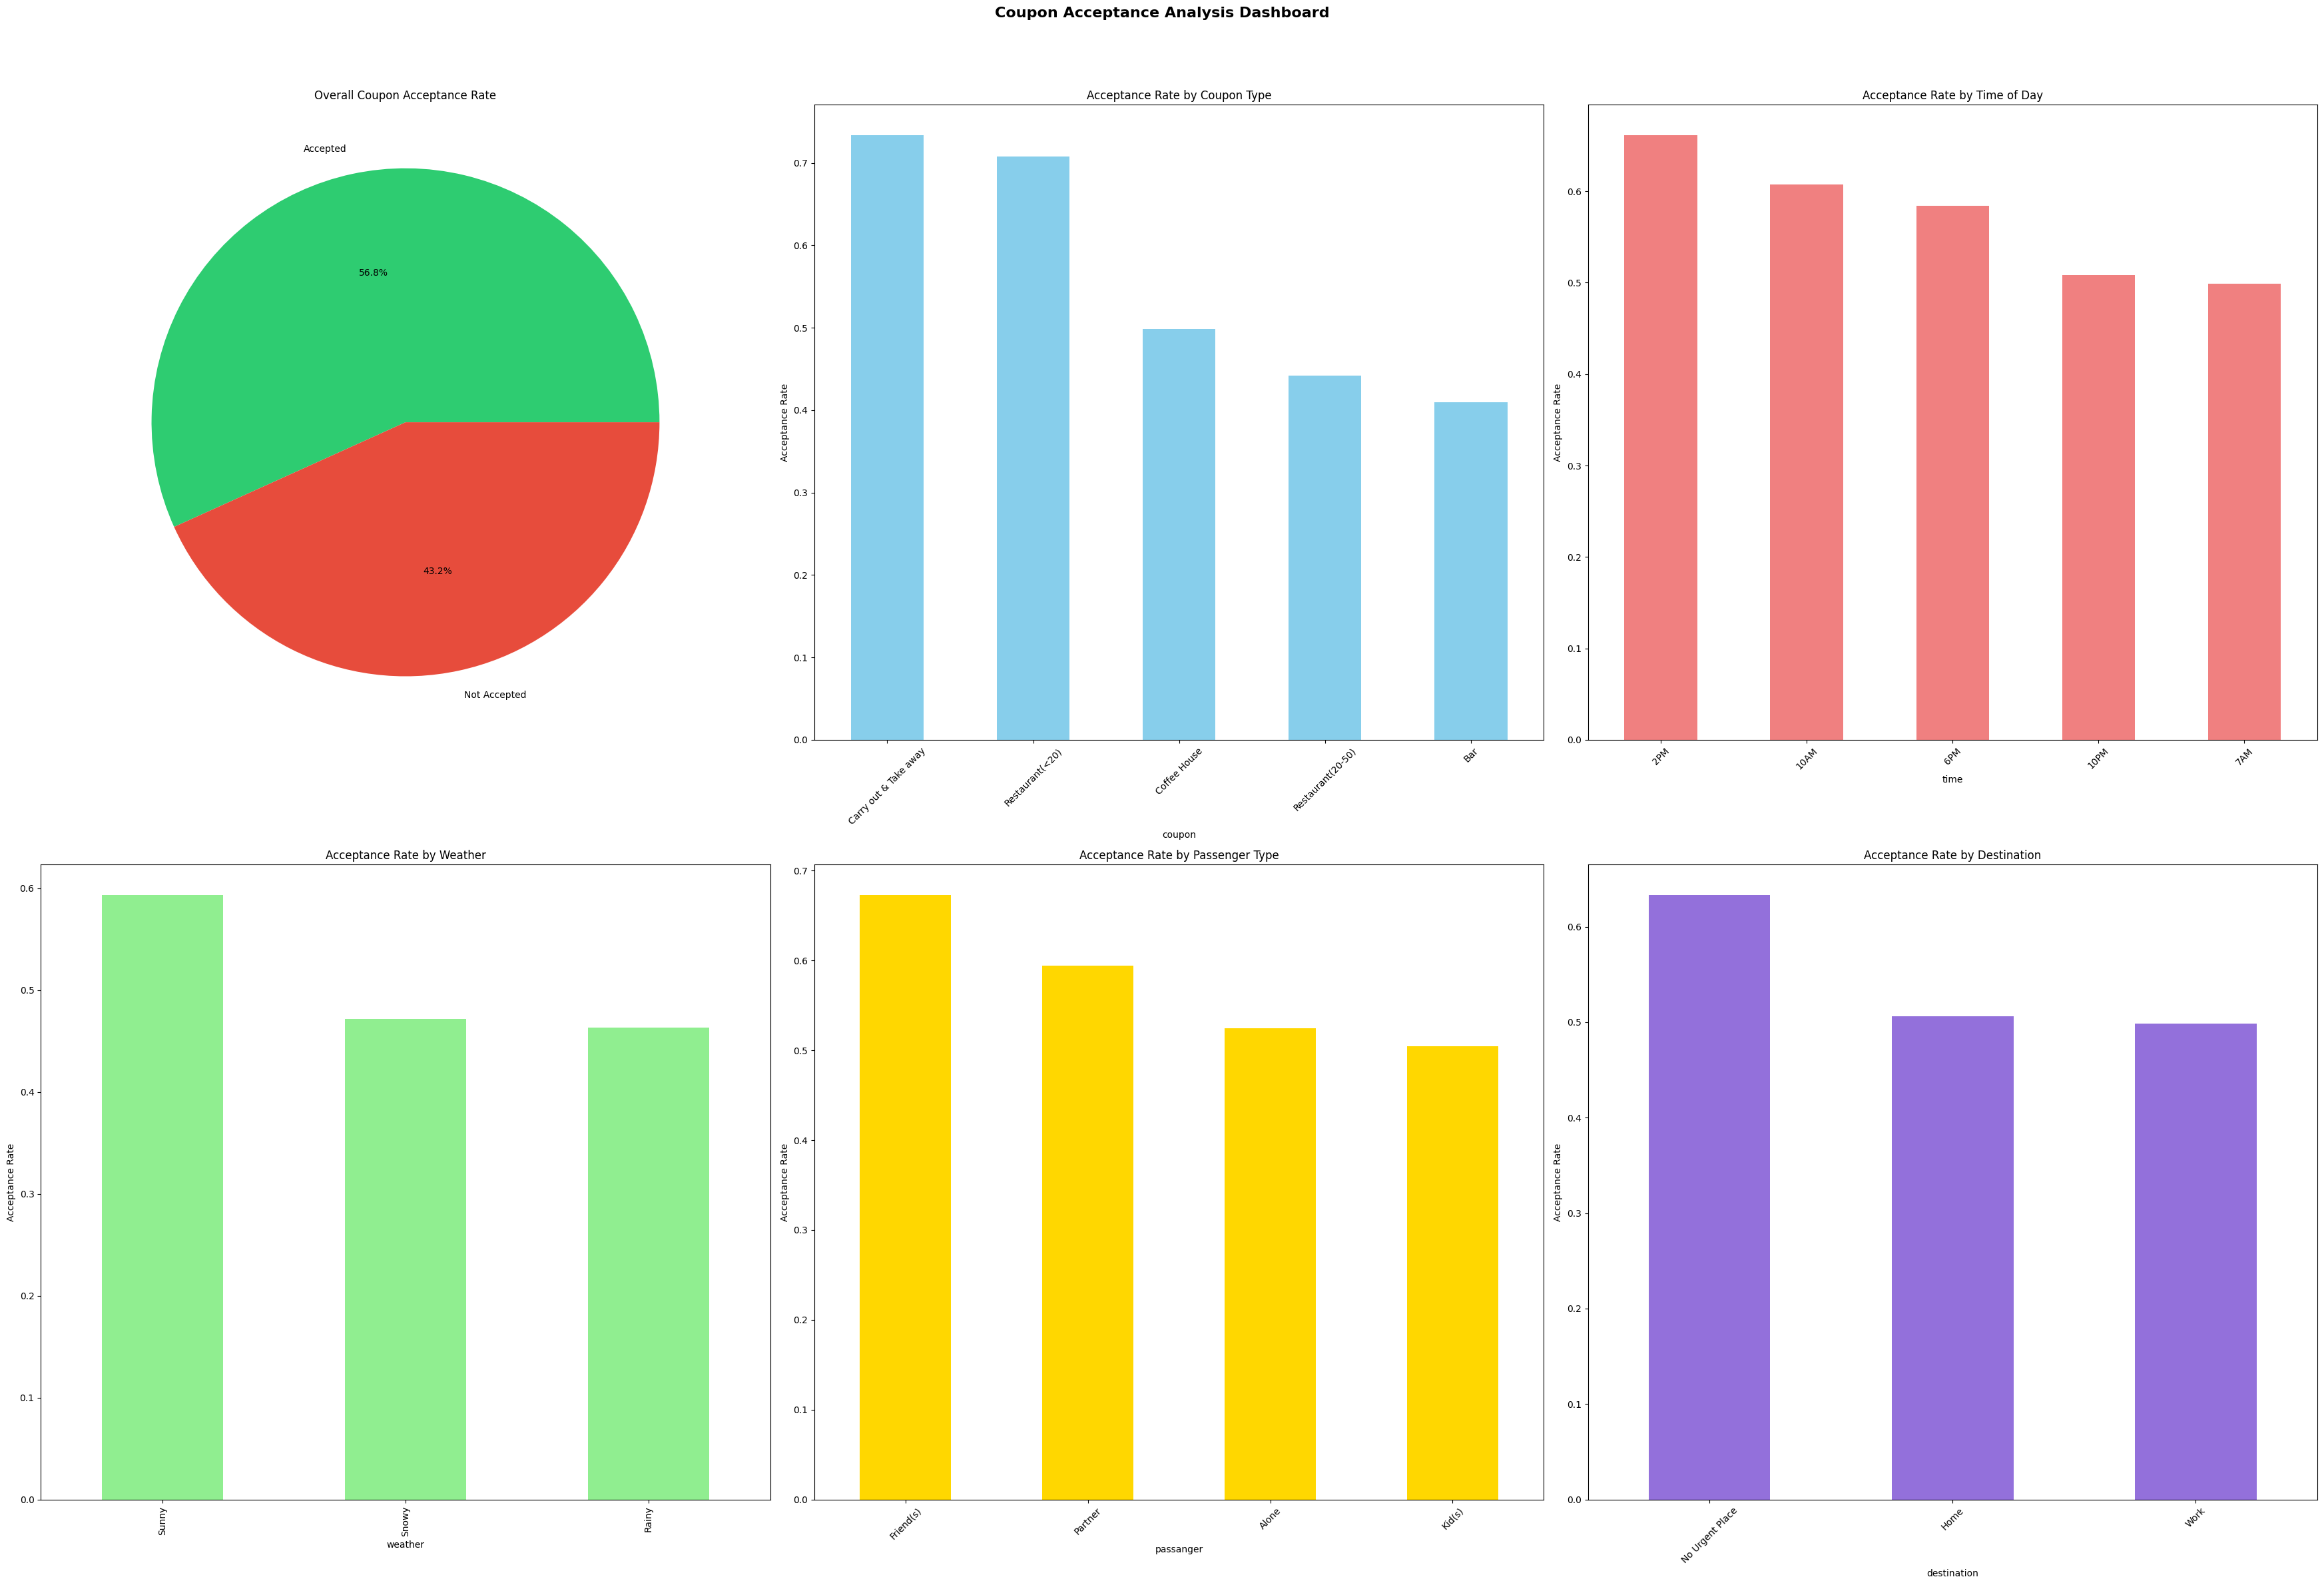

KEY INSIGHTS:
1. Overall acceptance rate: 56.8%
2. Best performing coupon type: Carry out & Take away (73.4%)
3. Best time for coupon delivery: 2PM (66.2%)
4. Best weather condition: Sunny (59.3%)
5. Best passenger type: Friend(s) (67.3%)


In [46]:

# 1. COMPREHENSIVE OVERVIEW DASHBOARD
figure, axes = plt.subplots(2, 3, figsize=(35, 25))
figure.suptitle('Coupon Acceptance Analysis Dashboard', fontsize=16, fontweight='bold')

# 1.1 Overall acceptance rate
over_all_acceptance_rate = data['Y'].mean()
axes[0,0].pie([over_all_acceptance_rate, 1-over_all_acceptance_rate], 
               labels=['Accepted', 'Not Accepted'], 
               autopct='%1.1f%%', 
               colors=['#2ecc71', '#e74c3c'])
axes[0,0].set_title('Overall Coupon Acceptance Rate')

# 1.2 Acceptance by coupon type
coupon_acceptance = data.groupby('coupon')['Y'].agg(['count', 'mean']).sort_values('mean', ascending=False)
coupon_acceptance['mean'].plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Acceptance Rate by Coupon Type')
axes[0,1].set_ylabel('Acceptance Rate')
axes[0,1].tick_params(axis='x', rotation=45)

# 1.3 Acceptance by time of day
time_acceptance = data.groupby('time')['Y'].mean().sort_values(ascending=False)
time_acceptance.plot(kind='bar', ax=axes[0,2], color='lightcoral')
axes[0,2].set_title('Acceptance Rate by Time of Day')
axes[0,2].set_ylabel('Acceptance Rate')
axes[0,2].tick_params(axis='x', rotation=45)

# 1.4 Acceptance by weather
weather_acceptance = data.groupby('weather')['Y'].mean().sort_values(ascending=False)
weather_acceptance.plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Acceptance Rate by Weather')
axes[1,0].set_ylabel('Acceptance Rate')

# 1.5 Acceptance by passenger type
passenger_acceptance = data.groupby('passanger')['Y'].mean().sort_values(ascending=False)
passenger_acceptance.plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Acceptance Rate by Passenger Type')
axes[1,1].set_ylabel('Acceptance Rate')
axes[1,1].tick_params(axis='x', rotation=45)

# 1.6 Acceptance by destination
dest_acceptance = data.groupby('destination')['Y'].mean().sort_values(ascending=False)
dest_acceptance.plot(kind='bar', ax=axes[1,2], color='mediumpurple')
axes[1,2].set_title('Acceptance Rate by Destination')
axes[1,2].set_ylabel('Acceptance Rate')
axes[1,2].tick_params(axis='x', rotation=45)

# Fix the subtitle cutting issue by adjusting layout with proper spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
plt.savefig('images/coupon_acceptance_dashboard.png', dpi=300)
plt.show()

# Print insights
print("KEY INSIGHTS:")
print(f"1. Overall acceptance rate: {acceptance_rate:.1%}")
print(f"2. Best performing coupon type: {coupon_acceptance.index[0]} ({coupon_acceptance['mean'].iloc[0]:.1%})")
print(f"3. Best time for coupon delivery: {time_acceptance.index[0]} ({time_acceptance.iloc[0]:.1%})")
print(f"4. Best weather condition: {weather_acceptance.index[0]} ({weather_acceptance.iloc[0]:.1%})")
print(f"5. Best passenger type: {passenger_acceptance.index[0]} ({passenger_acceptance.iloc[0]:.1%})")

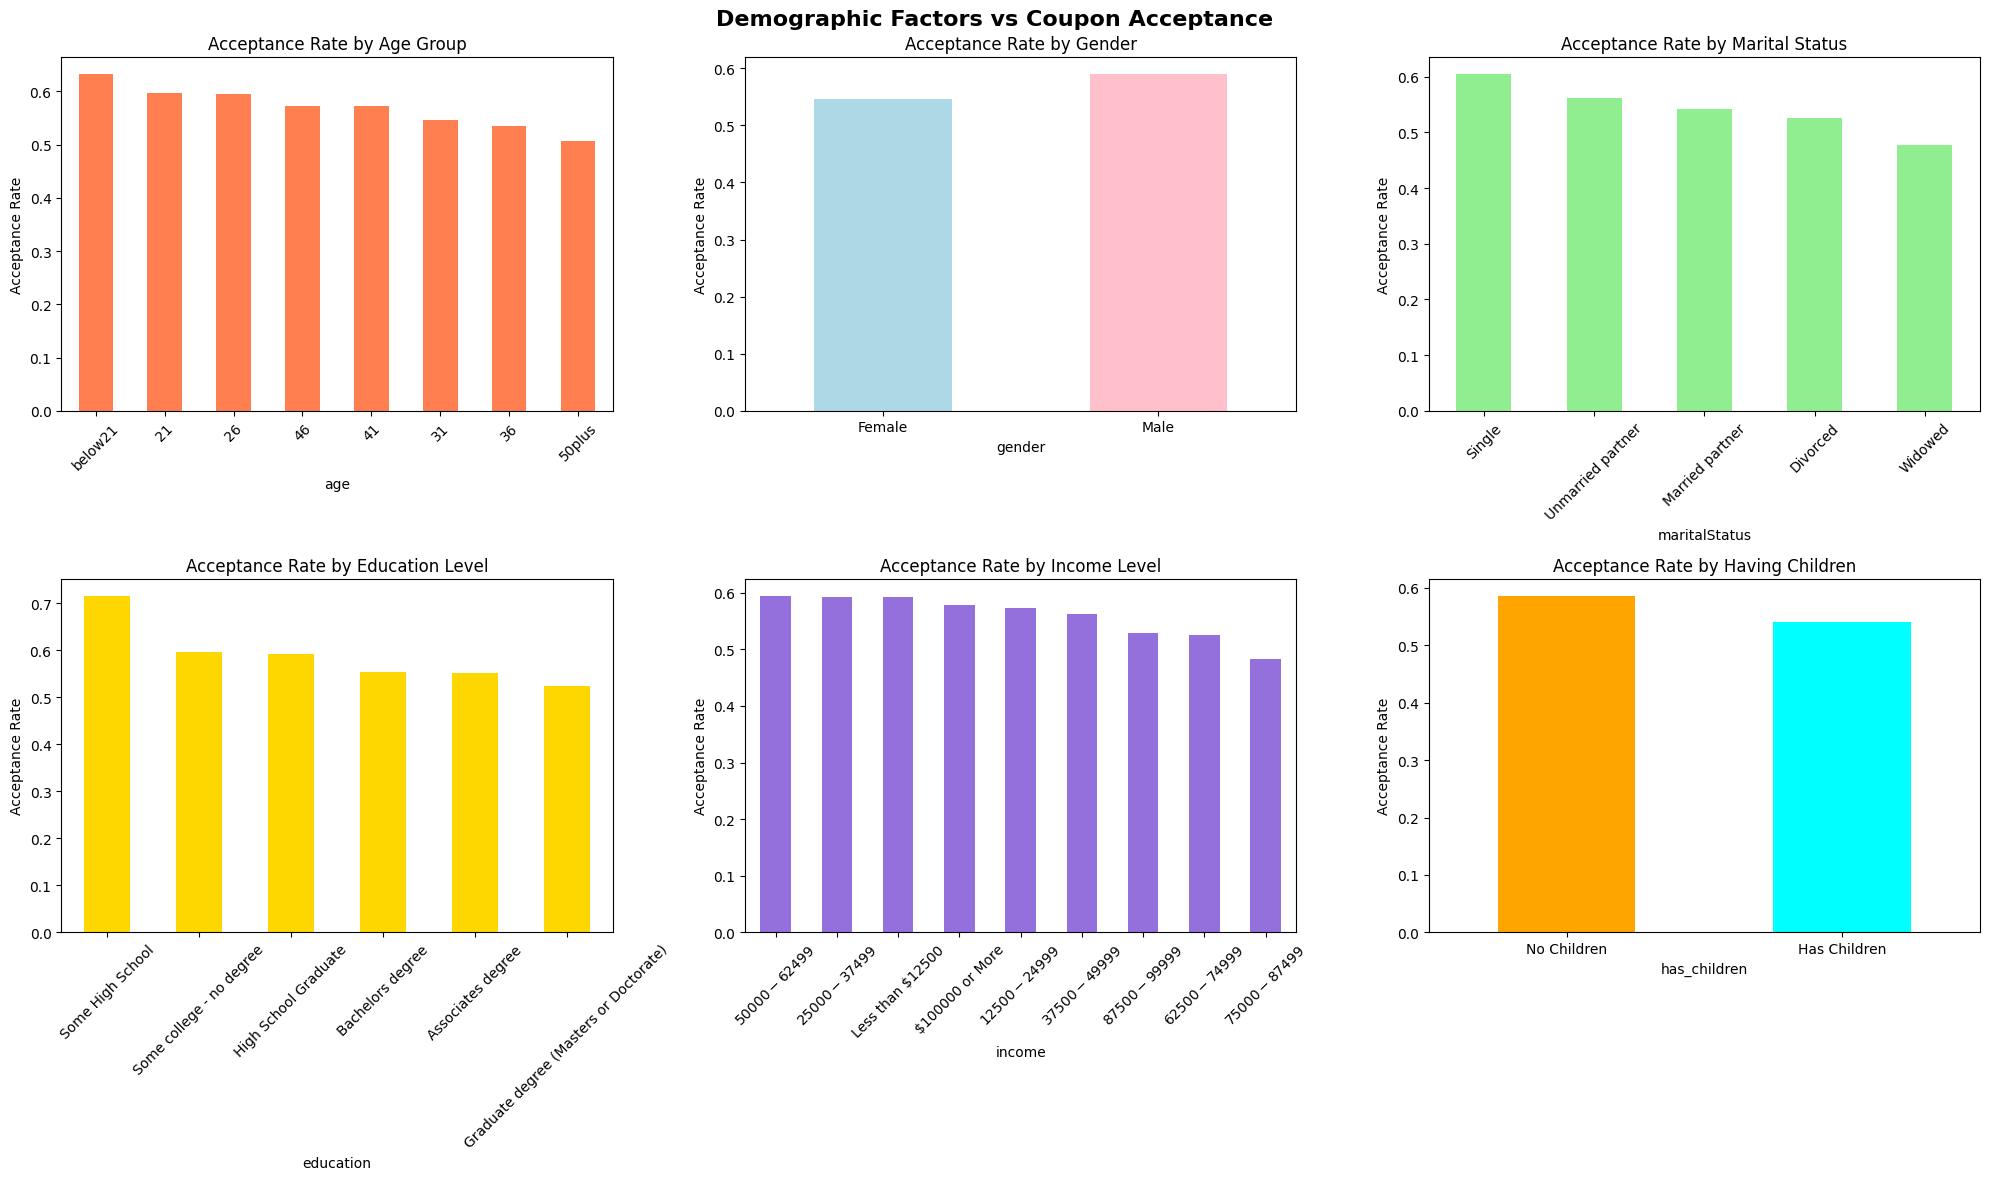

DEMOGRAPHIC INSIGHTS:
1. Best age group: below21 (63.2%)
2. Gender difference: {'Female': 0.5464523110217963, 'Male': 0.589806220485263}
3. Best marital status: Single (60.5%)
4. Best education level: Some High School (71.6%)
5. Best income level: $50000 - $62499 (59.5%)


In [47]:
# 2. DEMOGRAPHIC ANALYSIS
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Demographic Factors vs Coupon Acceptance', fontsize=16, fontweight='bold')

# 2.1 Age vs Acceptance
age_acceptance = data.groupby('age')['Y'].mean().sort_values(ascending=False)
age_acceptance.plot(kind='bar', ax=axes[0,0], color='coral')
axes[0,0].set_title('Acceptance Rate by Age Group')
axes[0,0].set_ylabel('Acceptance Rate')
axes[0,0].tick_params(axis='x', rotation=45)

# 2.2 Gender vs Acceptance
gender_acceptance = data.groupby('gender')['Y'].mean()
gender_acceptance.plot(kind='bar', ax=axes[0,1], color=['lightblue', 'pink'])
axes[0,1].set_title('Acceptance Rate by Gender')
axes[0,1].set_ylabel('Acceptance Rate')
axes[0,1].tick_params(axis='x', rotation=0)

# 2.3 Marital Status vs Acceptance
marital_acceptance = data.groupby('maritalStatus')['Y'].mean().sort_values(ascending=False)
marital_acceptance.plot(kind='bar', ax=axes[0,2], color='lightgreen')
axes[0,2].set_title('Acceptance Rate by Marital Status')
axes[0,2].set_ylabel('Acceptance Rate')
axes[0,2].tick_params(axis='x', rotation=45)

# 2.4 Education vs Acceptance
education_acceptance = data.groupby('education')['Y'].mean().sort_values(ascending=False)
education_acceptance.plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Acceptance Rate by Education Level')
axes[1,0].set_ylabel('Acceptance Rate')
axes[1,0].tick_params(axis='x', rotation=45)

# 2.5 Income vs Acceptance
income_acceptance = data.groupby('income')['Y'].mean().sort_values(ascending=False)
income_acceptance.plot(kind='bar', ax=axes[1,1], color='mediumpurple')
axes[1,1].set_title('Acceptance Rate by Income Level')
axes[1,1].set_ylabel('Acceptance Rate')
axes[1,1].tick_params(axis='x', rotation=45)

# 2.6 Children vs Acceptance
children_acceptance = data.groupby('has_children')['Y'].mean()
children_acceptance.plot(kind='bar', ax=axes[1,2], color=['orange', 'cyan'])
axes[1,2].set_title('Acceptance Rate by Having Children')
axes[1,2].set_ylabel('Acceptance Rate')
axes[1,2].set_xticklabels(['No Children', 'Has Children'], rotation=0)

plt.tight_layout()
plt.savefig('images/demographic_acceptance_analysis.png', dpi=300)
plt.show()

print("DEMOGRAPHIC INSIGHTS:")
print(f"1. Best age group: {age_acceptance.index[0]} ({age_acceptance.iloc[0]:.1%})")
print(f"2. Gender difference: {gender_acceptance.to_dict()}")
print(f"3. Best marital status: {marital_acceptance.index[0]} ({marital_acceptance.iloc[0]:.1%})")
print(f"4. Best education level: {education_acceptance.index[0]} ({education_acceptance.iloc[0]:.1%})")
print(f"5. Best income level: {income_acceptance.index[0]} ({income_acceptance.iloc[0]:.1%})")

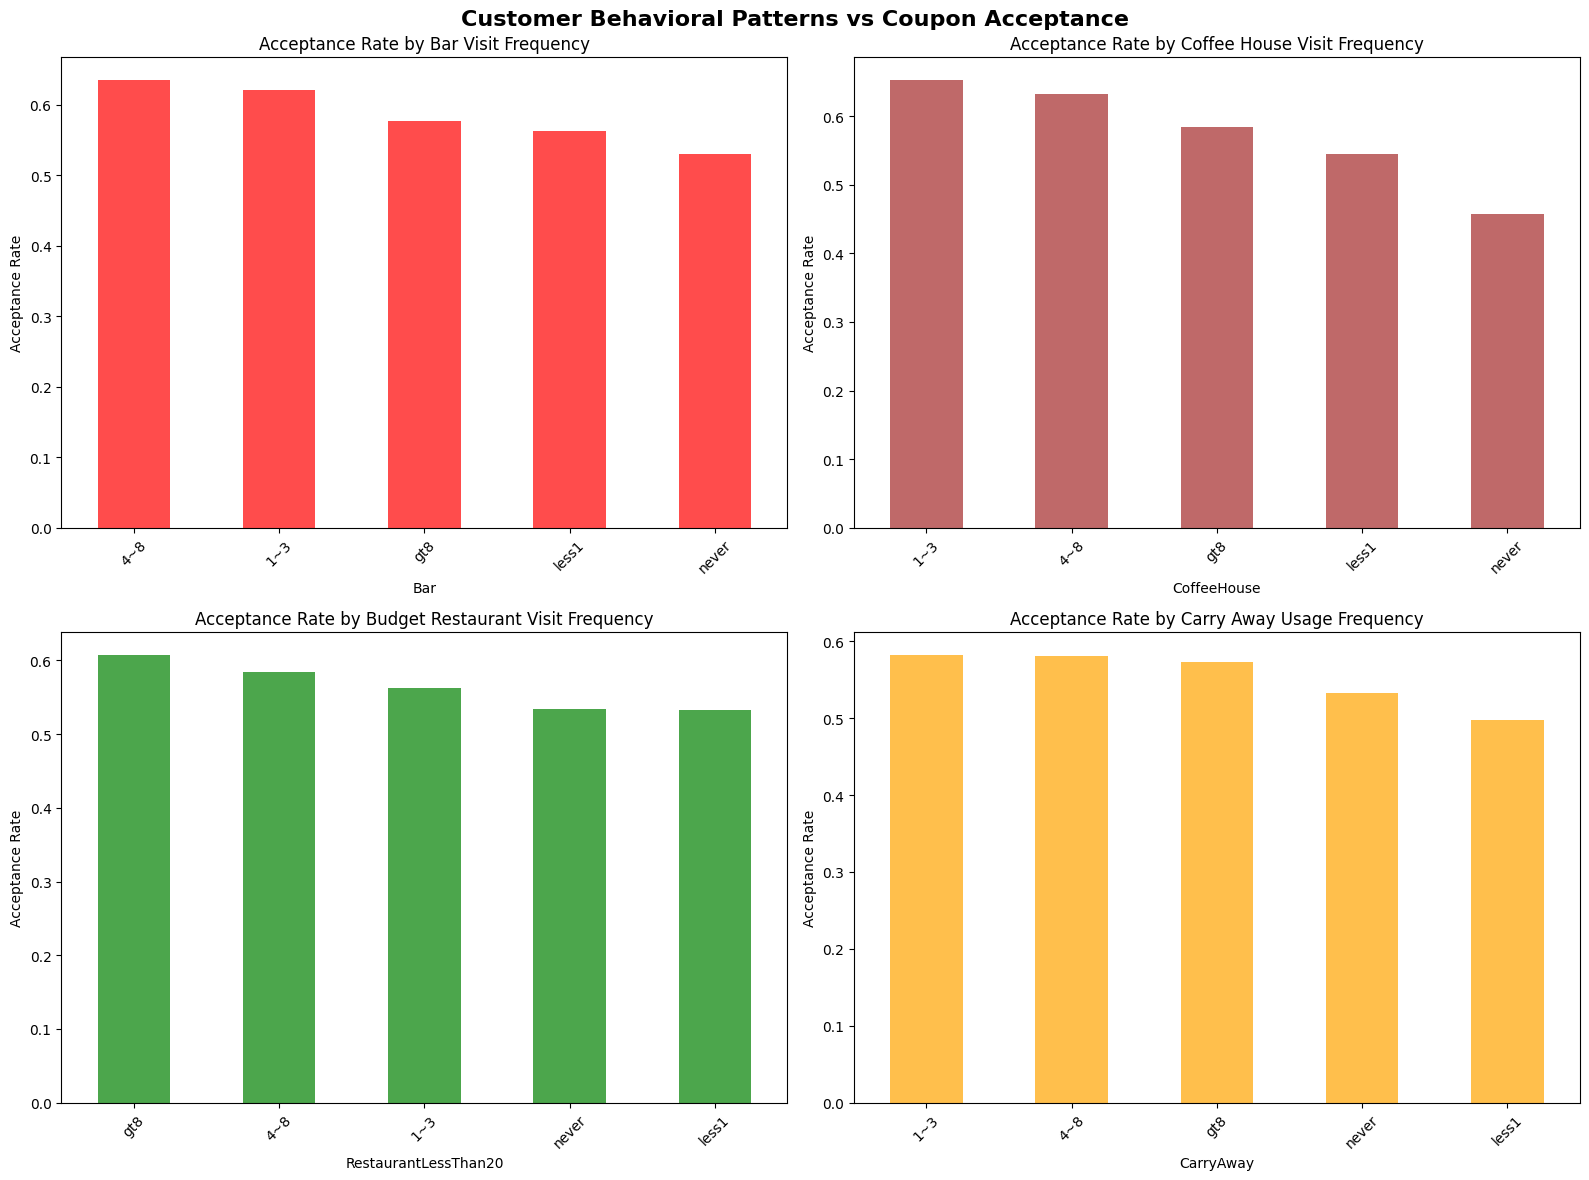

BEHAVIORAL INSIGHTS:
1. Best bar frequency: 4~8 (63.6%)
2. Best coffee house frequency: 1~3 (65.3%)
3. Best restaurant (<$20) frequency: gt8 (60.8%)
4. Best carry away frequency: 1~3 (58.2%)


In [48]:
# 3. BEHAVIORAL PATTERNS ANALYSIS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Behavioral Patterns vs Coupon Acceptance', fontsize=16, fontweight='bold')

# 3.1 Bar frequency vs Acceptance
bar_acceptance = data.groupby('Bar')['Y'].mean().sort_values(ascending=False)
bar_acceptance.plot(kind='bar', ax=axes[0,0], color='red', alpha=0.7)
axes[0,0].set_title('Acceptance Rate by Bar Visit Frequency')
axes[0,0].set_ylabel('Acceptance Rate')
axes[0,0].tick_params(axis='x', rotation=45)

# 3.2 Coffee House frequency vs Acceptance
coffee_acceptance = data.groupby('CoffeeHouse')['Y'].mean().sort_values(ascending=False)
coffee_acceptance.plot(kind='bar', ax=axes[0,1], color='brown', alpha=0.7)
axes[0,1].set_title('Acceptance Rate by Coffee House Visit Frequency')
axes[0,1].set_ylabel('Acceptance Rate')
axes[0,1].tick_params(axis='x', rotation=45)

# 3.3 Restaurant (<$20) frequency vs Acceptance
rest20_acceptance = data.groupby('RestaurantLessThan20')['Y'].mean().sort_values(ascending=False)
rest20_acceptance.plot(kind='bar', ax=axes[1,0], color='green', alpha=0.7)
axes[1,0].set_title('Acceptance Rate by Budget Restaurant Visit Frequency')
axes[1,0].set_ylabel('Acceptance Rate')
axes[1,0].tick_params(axis='x', rotation=45)

# 3.4 CarryAway frequency vs Acceptance
carryaway_acceptance = data.groupby('CarryAway')['Y'].mean().sort_values(ascending=False)
carryaway_acceptance.plot(kind='bar', ax=axes[1,1], color='orange', alpha=0.7)
axes[1,1].set_title('Acceptance Rate by Carry Away Usage Frequency')
axes[1,1].set_ylabel('Acceptance Rate')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('images/behavioral_acceptance_analysis.png', dpi=300)
plt.show()

print("BEHAVIORAL INSIGHTS:")
print(f"1. Best bar frequency: {bar_acceptance.index[0]} ({bar_acceptance.iloc[0]:.1%})")
print(f"2. Best coffee house frequency: {coffee_acceptance.index[0]} ({coffee_acceptance.iloc[0]:.1%})")
print(f"3. Best restaurant (<$20) frequency: {rest20_acceptance.index[0]} ({rest20_acceptance.iloc[0]:.1%})")
print(f"4. Best carry away frequency: {carryaway_acceptance.index[0]} ({carryaway_acceptance.iloc[0]:.1%})")